<a href="https://colab.research.google.com/github/Shambsri21/Employeesatis/blob/main/Employeesatis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/employeesatis.csv")
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


In [ ]:
df.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [ ]:
cols = ['Emp ID', 'last_evaluation', 'number_project', 'Work_accident', 'dept']
df = df.drop(cols, axis=1)

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary
0,0.38,157.0,3.0,0.0,low
1,0.80,262.0,6.0,0.0,medium
2,0.11,272.0,4.0,0.0,medium
3,0.72,223.0,5.0,0.0,low
4,0.37,159.0,3.0,0.0,low


<ipython-input-119-957cca8e6744>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['satisfaction_level'])


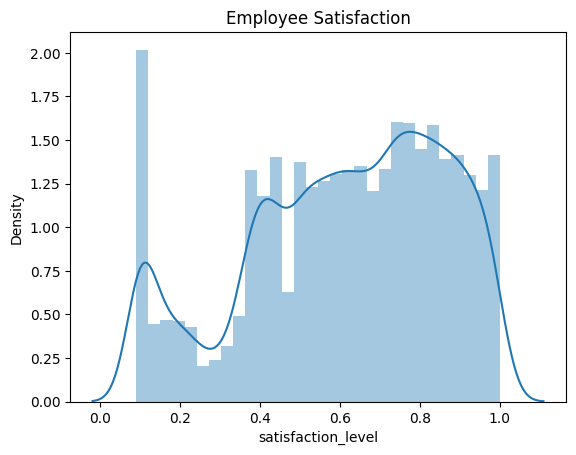

In [ ]:
plt.title('Employee Satisfaction')
sns.distplot(df['satisfaction_level'])
plt.show()

In [ ]:
salary_mapping = {'low': 1, 'medium': 2, 'high': 3}
df['salary_numeric'] = df['salary'].map(salary_mapping)

df = df.drop('salary', axis=1)


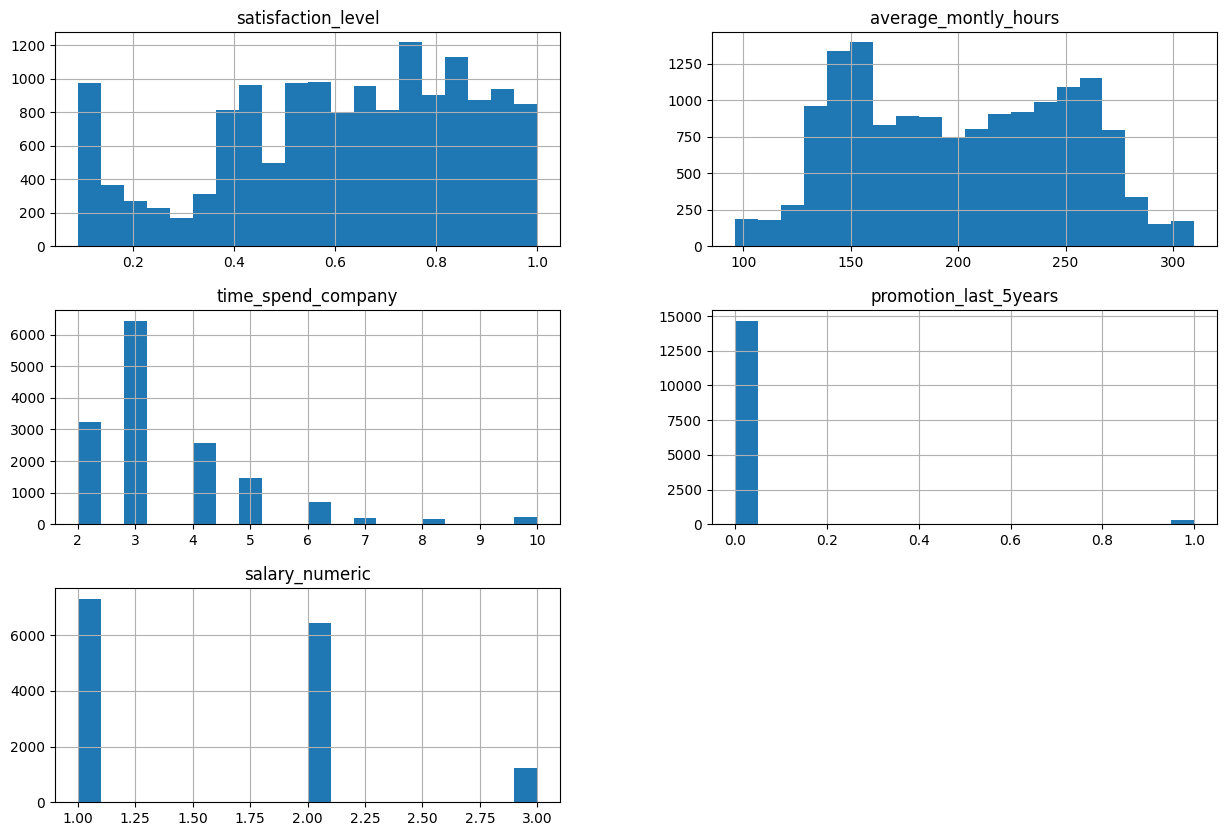

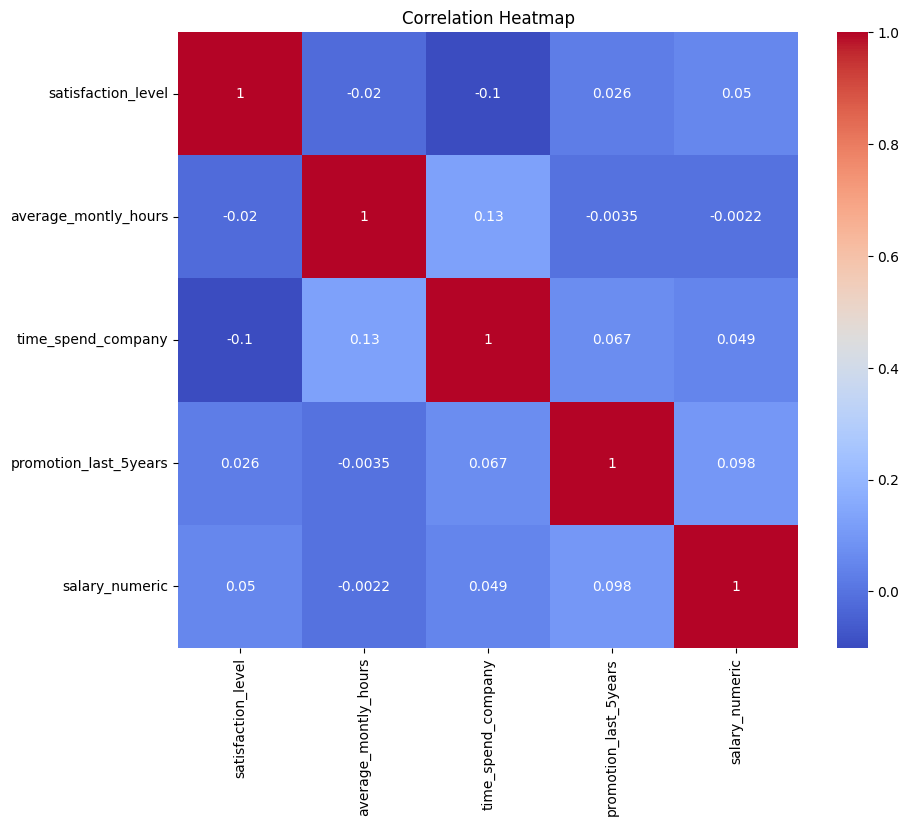

In [ ]:
df.describe()
df.hist(bins=20, figsize=(15,10))
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
x = df.drop('satisfaction_level', axis=1)
y = df['satisfaction_level']

In [ ]:
print("Shape of X (independent variables):", x.shape)
print("Shape of y (dependent variable):", y.shape)

Shape of X (independent variables): (14999, 4)
Shape of y (dependent variable): (14999,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
# regressor = LinearRegression()
# regressor.fit(x_train, y_train)

In [ ]:
# y_pred = regressor.predict(x_test)

In [ ]:
# print("Intercept (b0):", regressor.intercept_)
# print("Coefficients (b1, b2, ...):", regressor.coef_)

In [ ]:
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print("Mean Squared Error (MSE):", mse)
# print("R-Squared (R2 Score):", r2)

In [ ]:
# plt.scatter(y_test, y_pred, color='green')
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linewidth=2)
# plt.title('Actual vs Predicted Satisfaction Level')
# plt.xlabel('Actual Satisfaction Level')
# plt.ylabel('Predicted Satisfaction Level')
# plt.show()

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
    return mse, r2, cv_scores.mean()

In [ ]:
# Linear Regression
lr = LinearRegression()
lr_mse, lr_r2, lr_cv = evaluate_model(lr, x_train_scaled, x_test_scaled, y_train, y_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso_mse, lasso_r2, lasso_cv = evaluate_model(lasso, x_train_scaled, x_test_scaled, y_train, y_test)

# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge_mse, ridge_r2, ridge_cv = evaluate_model(ridge, x_train_scaled, x_test_scaled, y_train, y_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mse, rf_r2, rf_cv = evaluate_model(rf, x_train, x_test, y_train, y_test)

models = ['Linear Regression', 'Lasso', 'Ridge', 'Random Forest']
for model, mse, r2, cv in zip(models, [lr_mse, lasso_mse, ridge_mse, rf_mse],
                              [lr_r2, lasso_r2, ridge_r2, rf_r2],
                              [lr_cv, lasso_cv, ridge_cv, rf_cv]):
    print(f"{model}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  R2: {r2:.4f}")
    print(f"  Cross-validation R2: {cv:.4f}")
    print()


Linear Regression:
  MSE: 0.0617
  R2: 0.0110
  Cross-validation R2: 0.0140

Lasso:
  MSE: 0.0624
  R2: -0.0000
  Cross-validation R2: -0.0003

Ridge:
  MSE: 0.0617
  R2: 0.0110
  Cross-validation R2: 0.0140

Random Forest:
  MSE: 0.0487
  R2: 0.2199
  Cross-validation R2: 0.2101



<Axes: ylabel='satisfaction_level'>

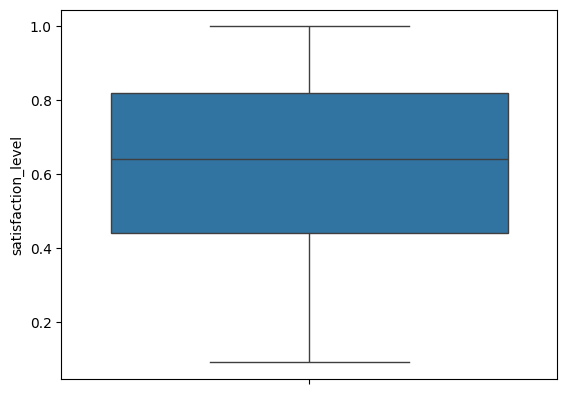

In [ ]:
sns.boxplot(df['satisfaction_level'])

In [ ]:
def plot_actual_vs_predicted(model, x_test, y_test, title):
    y_pred = model.predict(x_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='green', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Satisfaction Level')
    plt.ylabel('Predicted Satisfaction Level')
    plt.title(title)
    plt.show()

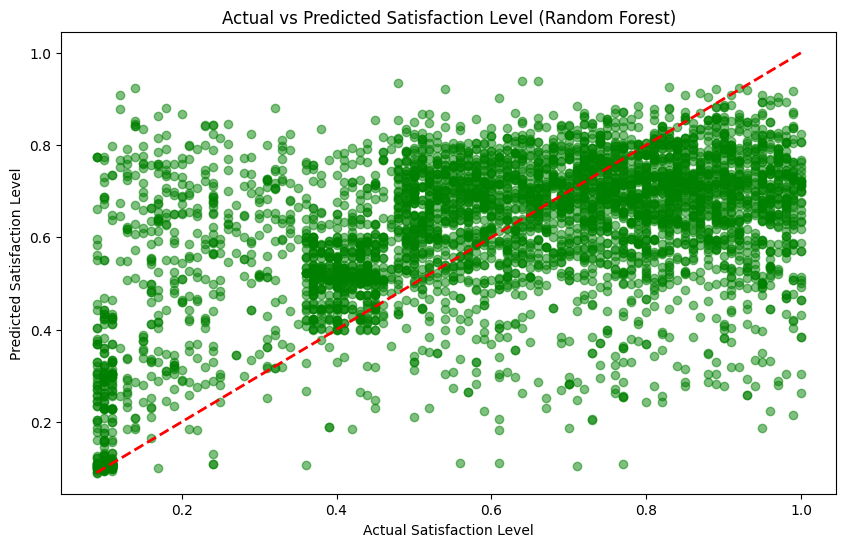

In [ ]:
plot_actual_vs_predicted(rf, x_test, y_test, 'Actual vs Predicted Satisfaction Level (Random Forest)')


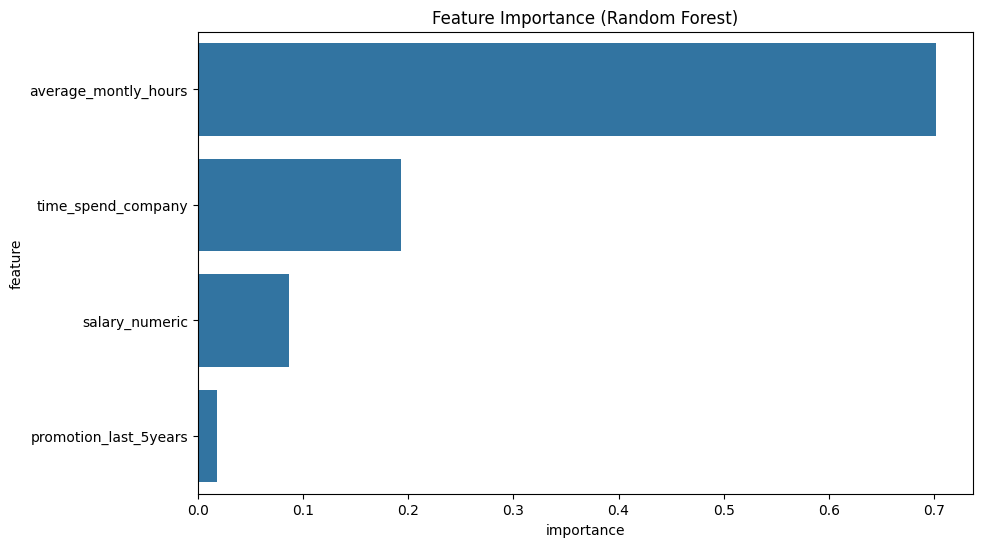

In [ ]:
#importance
importances = rf.feature_importances_
feature_imp = pd.DataFrame({'feature': x.columns, 'importance': importances})
feature_imp = feature_imp.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_imp)
plt.title('Feature Importance (Random Forest)')
plt.show()